# Import Libraries

In [2438]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE

# Load the Dataset

In [2439]:
# Load data
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [2440]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Data Analysis and Preprocessing

In [2441]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [2442]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [2443]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


There is absurdity in the features of "creatinine phosphokinase", "serum creatinine" and "platelets".

In [2444]:
## Explore unique values for each column
column_names = list(data.columns)
for col_name in column_names:
    print(col_name, ':', data[col_name].nunique(), )

age : 47
anaemia : 2
creatinine_phosphokinase : 208
diabetes : 2
ejection_fraction : 17
high_blood_pressure : 2
platelets : 176
serum_creatinine : 40
serum_sodium : 27
sex : 2
smoking : 2
time : 148
DEATH_EVENT : 2


In [2445]:
## Checking first 10 values
print(sorted(data.creatinine_phosphokinase, reverse=True)[:11])
print(sorted(data.platelets, reverse=True)[:11])
print(sorted(data.serum_creatinine, reverse=True)[:11])

print(sorted(data.ejection_fraction, reverse=True)[:11])

[7861, 7702, 5882, 5209, 4540, 3966, 3964, 2794, 2695, 2656, 2522]
[850000.0, 742000.0, 621000.0, 543000.0, 533000.0, 507000.0, 504000.0, 497000.0, 481000.0, 461000.0, 454000.0]
[9.4, 9.0, 6.8, 6.1, 5.8, 5.0, 4.4, 4.0, 3.8, 3.7, 3.5]
[80, 70, 65, 62, 62, 60, 60, 60, 60, 60, 60]


In [2446]:
## Find median values
print(data.median())

age                             60.0
anaemia                          0.0
creatinine_phosphokinase       250.0
diabetes                         0.0
ejection_fraction               38.0
high_blood_pressure              0.0
platelets                   262000.0
serum_creatinine                 1.1
serum_sodium                   137.0
sex                              1.0
smoking                          0.0
time                           115.0
DEATH_EVENT                      0.0
dtype: float64


In [2447]:
## This part replaces the values above 75% in the 3 specified columns with the median value.
## But I decided not to use it.

# change the columns to the differnt column you want to replace
columns_to_replace = ['platelets', 'creatinine_phosphokinase', 'serum_creatinine']

# Calculate the median values for all columns
medians = data.median()

# Calculate the 75th and 25th percentile for specified column
percentiles_75 = data[['platelets', 'creatinine_phosphokinase', 'serum_creatinine']].quantile(0.75)
percentiles_25 = data[['platelets', 'creatinine_phosphokinase']].quantile(0.25)

# Replace values above the 75th percentile with the median value for the specified  column
data[['platelets', 'creatinine_phosphokinase', 'serum_creatinine']] = data[['platelets', 'creatinine_phosphokinase', 'serum_creatinine']].where(data[['platelets', 'creatinine_phosphokinase', 'serum_creatinine']] <= percentiles_75, medians, axis=1)

# Replace values under the 25th percentile with the median value for the specified  column
data[['platelets', 'creatinine_phosphokinase']] = data[['platelets', 'creatinine_phosphokinase']].where(data[['platelets', 'creatinine_phosphokinase']] >= percentiles_25, medians, axis=1)

# Print the modified DataFrame
data


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.1,130,1,0,4,1
1,55.0,0,250,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,262000.00,1.3,129,1,1,7,1
3,50.0,1,250,0,20,0,262000.00,1.1,137,1,0,7,1
4,65.0,1,160,1,20,0,262000.00,1.1,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,250,1,38,1,262000.00,1.1,143,1,1,270,0
295,55.0,0,250,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,250,1,60,0,262000.00,0.8,138,0,0,278,0
297,45.0,0,250,0,38,0,262000.00,1.4,140,1,1,280,0


In [2448]:
## Checking first 10 values
print(sorted(data.creatinine_phosphokinase, reverse=True)[:11])
print(sorted(data.platelets, reverse=True)[:11])
print(sorted(data.serum_creatinine, reverse=True)[:11])

[582, 582, 582, 582, 582, 582, 582, 582, 582, 582, 582]
[303000.0, 302000.0, 302000.0, 302000.0, 301000.0, 300000.0, 298000.0, 297000.0, 297000.0, 295000.0, 294000.0]
[1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.3, 1.3]


In [2449]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,297.568562,0.418060,38.083612,0.351171,258374.417224,1.035886,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,141.054411,0.494067,11.834841,0.478136,17351.459317,0.175264,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,118.000000,0.000000,14.000000,0.000000,213000.000000,0.500000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,250.000000,0.000000,30.000000,0.000000,262000.000000,0.900000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,295.000000,1.000000,45.000000,1.000000,262000.000000,1.100000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,582.000000,1.000000,80.000000,1.000000,303000.000000,1.400000,148.000000,1.000000,1.00000,285.000000,1.00000


[Text(0, 0, '203'), Text(0, 0, '96')]

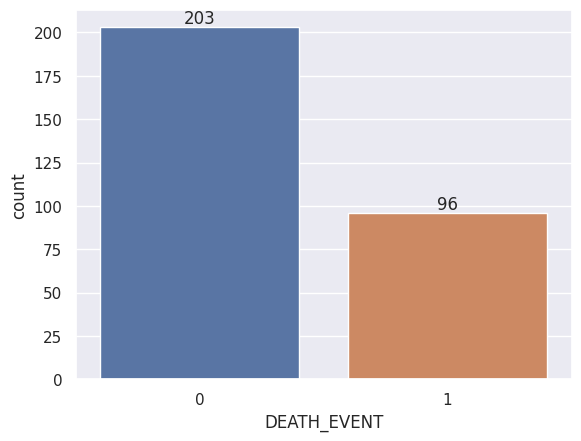

In [2450]:
## Checking target label distribustion
ax = sns.countplot(x= data["DEATH_EVENT"])
ax.bar_label(ax.containers[0])

Target labels (DEATH EVENT) are 203 versus 96 thus there is an imbalance in the data.

In [2451]:
## Check for correlation
corr_mat = data.corr(numeric_only=True)

<Axes: >

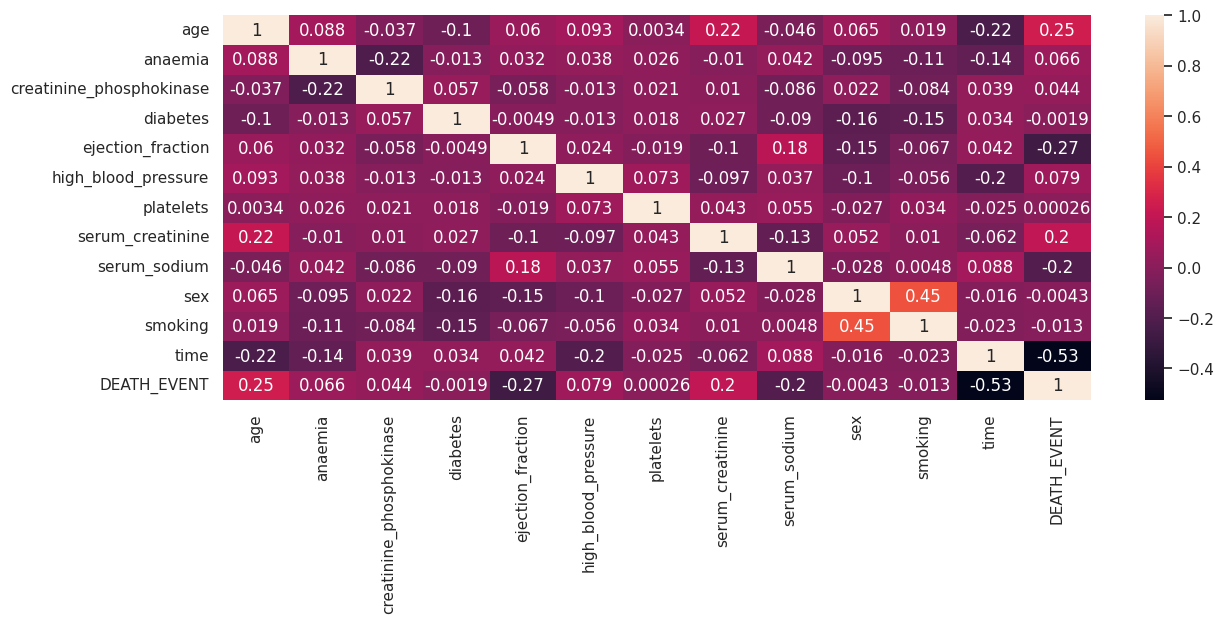

In [2452]:
## Showing correlation using heatmap
plt.figure(figsize=(14,5))
sns.heatmap(corr_mat, annot=True)

Death Event increases when "*time(Follow-up period)*", "*ejection_fraction*" and "*serum_sodium*" **decrease**.
Death Event increases when "*serum_creatinine*" and "*age*" **increase**.

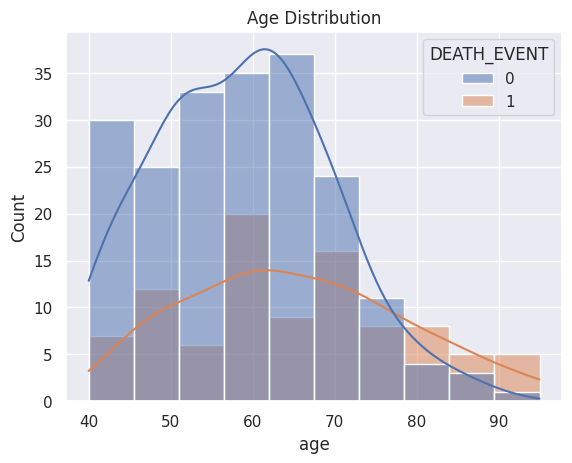

In [2453]:
## Visualize Age distribution on DEATH_EVENT
sns.set(style="darkgrid")
sns.histplot(x="age", hue="DEATH_EVENT", data=data, kde=True)
plt.title("Age Distribution")
plt.show()

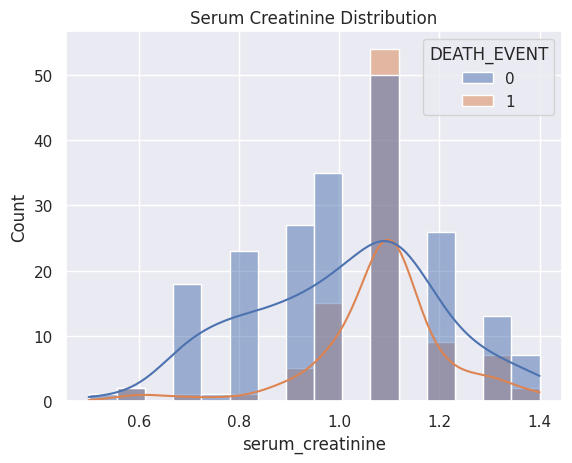

In [2454]:
## Visualize Serum Creatinine distribution on DEATH_EVENT
sns.set(style="darkgrid")
sns.histplot(x="serum_creatinine", hue="DEATH_EVENT", data=data, kde=True)
plt.title("Serum Creatinine Distribution")
plt.show()

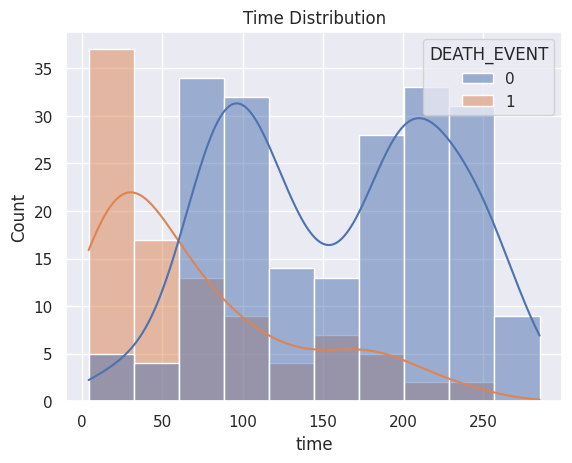

In [2455]:
## Visualize Time distribution on DEATH_EVENT
sns.set(style="darkgrid")
sns.histplot(x="time", hue="DEATH_EVENT", data=data, kde=True)
plt.title("Time Distribution")
plt.show()

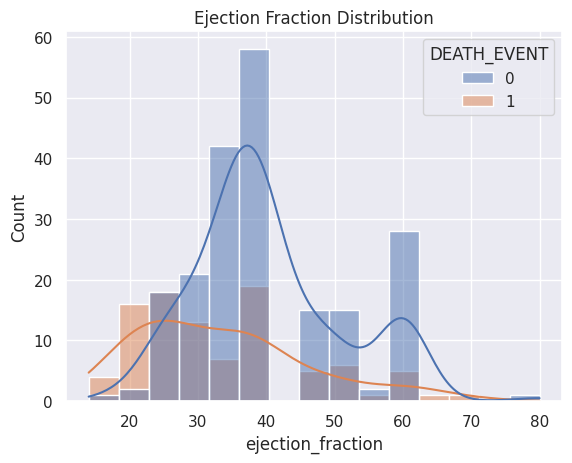

In [2456]:
## Visualize Ejection Fraction distribution on DEATH_EVENT
sns.set(style="darkgrid")
sns.histplot(x="ejection_fraction", hue="DEATH_EVENT", data=data, kde=True)
plt.title("Ejection Fraction Distribution")
plt.show()

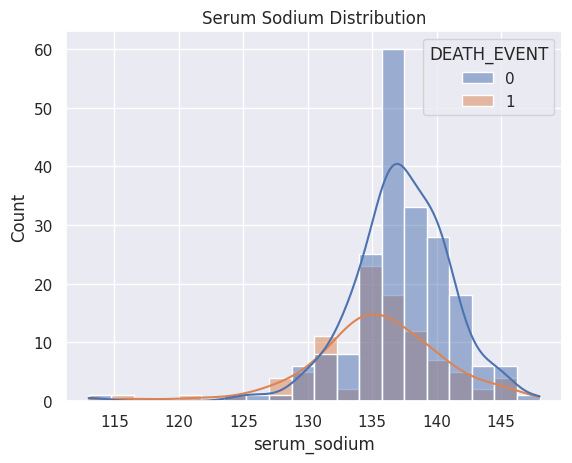

In [2457]:
## Visualize Serum Sodium distribution on DEATH_EVENT
sns.set(style="darkgrid")
sns.histplot(x="serum_sodium", hue="DEATH_EVENT", data=data, kde=True)
plt.title("Serum Sodium Distribution")
plt.show()

# Build an ANN Model

In [2458]:
## Selecting the dependent and independent variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

[Text(0.5, 1.0, 'Proportion of DEATH_EVENT After Oversampligs')]

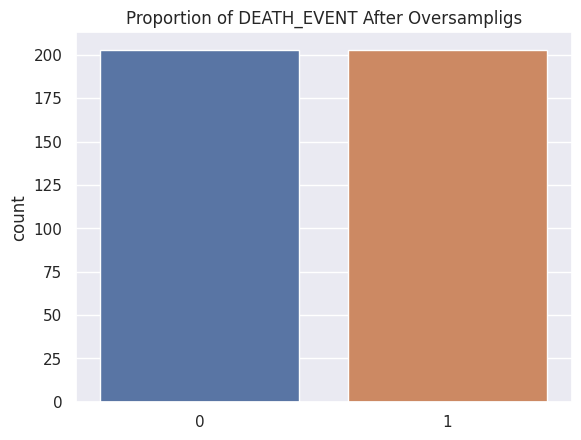

In [2459]:
## Fix imbalance in target label

## SMOTE(Synthetic Minority Over-Sampling Technique)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

## Plot Proportion of DEATH_EVENT After Oversampligs
sns.countplot(x=y_res).set(title='Proportion of DEATH_EVENT After Oversampligs')

In [2460]:
## Split our dataset
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=20, random_state=32)

In [2461]:
## Standardiazation -- input data is transformed to have a mean of zero and variance of 1
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [2462]:
## Set EarlyStopping function
"""
early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # min amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True)"""

'\nearly_stopping = callbacks.EarlyStopping(\n    min_delta=0.01, # min amount of change to count as an improvement\n    patience=10, # how many epochs to wait before stopping\n    restore_best_weights=True)'

In [2463]:
## Initialize the simple neural network
model =  Sequential()

## Input layers (HeNormal)
model.add(Dense(units = 18, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

## Hidden layer (HeNormal)
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))

## Regularization --- help to stop overfitting
model.add(Dropout(0.25))

## Output layer (GlorotUniform)
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

## Compiling the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [2464]:
## Summary
model.summary()

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_212 (Dense)           (None, 18)                234       
                                                                 
 dense_213 (Dense)           (None, 9)                 171       
                                                                 
 dropout_65 (Dropout)        (None, 9)                 0         
                                                                 
 dense_214 (Dense)           (None, 1)                 10        
                                                                 
Total params: 415
Trainable params: 415
Non-trainable params: 0
_________________________________________________________________


# Test Model Accuracy

In [2465]:
## Train our network
## train data, test data and validation data
## 20% for testing, 25% for validation and 55% for training
history = model.fit(X_train, y_train, batch_size= 32, epochs= 55, validation_split=0.25) # , callbacks=early_stopping

Epoch 1/55
10/10 [==============================] - 1s 25ms/step - loss: 0.6930 - accuracy: 0.5156 - val_loss: 0.6930 - val_accuracy: 0.4433
Epoch 2/55
10/10 [==============================] - 0s 6ms/step - loss: 0.6927 - accuracy: 0.5744 - val_loss: 0.6926 - val_accuracy: 0.5876
Epoch 3/55
10/10 [==============================] - 0s 6ms/step - loss: 0.6924 - accuracy: 0.5917 - val_loss: 0.6922 - val_accuracy: 0.4948
Epoch 4/55
10/10 [==============================] - 0s 7ms/step - loss: 0.6917 - accuracy: 0.6436 - val_loss: 0.6912 - val_accuracy: 0.7010
Epoch 5/55
10/10 [==============================] - 0s 6ms/step - loss: 0.6904 - accuracy: 0.7232 - val_loss: 0.6894 - val_accuracy: 0.7216
Epoch 6/55
10/10 [==============================] - 0s 7ms/step - loss: 0.6882 - accuracy: 0.7301 - val_loss: 0.6866 - val_accuracy: 0.7320
Epoch 7/55
10/10 [==============================] - 0s 6ms/step - loss: 0.6850 - accuracy: 0.7266 - val_loss: 0.6828 - val_accuracy: 0.7216
Epoch 8/55
10/10 [=

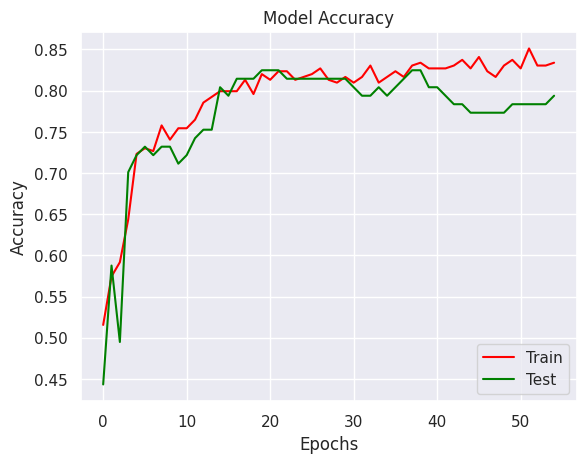

In [2466]:
plt.plot(history.history['accuracy'], color= 'red', label= 'Training Accuracy')
plt.plot(history.history['val_accuracy'], color= 'green', label= 'Testing Accuracy')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Test'], loc='lower right')
plt.show()

In [2467]:
## Save the model
model.save('simple_ann_model')

In [2468]:
## Load saved model
ANN_model = tf.keras.models.load_model('simple_ann_model')

In [2469]:
## Predict the model
y_pred_ann = ANN_model.predict(X_test)
y_pred_ann

1/1 [==============================] - 0s 92ms/step


array([[0.8377947 ],
       [0.26367342],
       [0.74451965],
       [0.5997388 ],
       [0.8753935 ],
       [0.6736081 ],
       [0.31397206],
       [0.8048806 ],
       [0.1435684 ],
       [0.9273056 ],
       [0.60370606],
       [0.0857046 ],
       [0.9228549 ],
       [0.97908515],
       [0.04172363],
       [0.07818219],
       [0.21615344],
       [0.496746  ],
       [0.537575  ],
       [0.84218776]], dtype=float32)

In [2470]:
## Cap the value
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)
y_pred_ann

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1]])

In [2471]:
## Classification report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20



In [2472]:
## Confusion matrix
cm = confusion_matrix(y_test, y_pred_ann)
cm

array([[7, 3],
       [1, 9]])

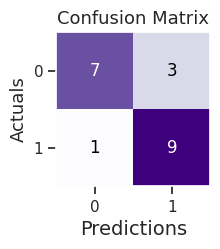

In [2473]:
## Confusion matrix plot
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(2,2), cmap=plt.cm.Purples)
plt.xlabel('Predictions', fontsize = 14)
plt.ylabel('Actuals', fontsize = 13)
plt.title('Confusion Matrix', fontsize = 13)
plt.show()

AUC: 0.800000


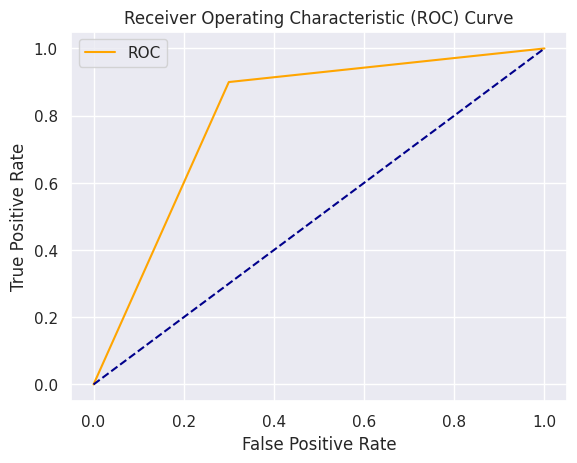

In [2474]:
## ROC curve
auc_mod2 = roc_auc_score(y_test, y_pred_ann)
print('AUC: %f' %auc_mod2)

fpr, tpr, _ = roc_curve(y_test, y_pred_ann)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()